In [1]:
# Import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from random import randint, uniform, randrange, sample






# Funciones para las transformaciones de las imagenes

### Funcion para redimensionamiento

In [2]:
def rdmt(imagen_in):
    
    ancho=int(randint(int(imagen_in.shape[1]/2),imagen_in.shape[1]))
    
    alto =int(randint(int(imagen_in.shape[0]/2),imagen_in.shape[0]))
    
    imagen_out= cv.resize(imagen_in, (ancho,alto), interpolation=cv.INTER_AREA)

    figure = plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.imshow(imagen_out)
    plt.title('Imagen redimensionada')

    return(imagen_out)

### Funcion para dibujar (círculos, rectángulos, líneas, texto).

In [3]:
#CIRCULO

def db_c (imagen_in):
    
    cantidad=randint(1,10)
    
    for i in range(cantidad):
        cx=randint(0,imagen_in.shape[1])
        cy=randint(0,imagen_in.shape[0])
        radio =randint(3,int((cx+cy)/2))
        r=randint(0,255)
        g=randint(0,255)
        b=randint(0,255)
        grosor=randint(4,20)
             # (fuente, cordenada de inicio, radio, color(rgb), grosos(thickness))
        imagen_out = cv.circle(imagen_in,(cx,cy),radio,(r,g,b),grosor)
    
    figure = plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.imshow(imagen_out)
    plt.title('Imagen con circulos')
    
    return(imagen_out)

In [4]:
#Rectangulo

def db_r (imagen_in):
    
    cantidad=randint(1,5)
    
    for i in range(cantidad):
        cx1=randint(0,imagen_in.shape[1])
        cy1=randint(0,imagen_in.shape[0])
        
        cx2=randint(0,imagen_in.shape[1])
        cy2=randint(0,imagen_in.shape[0])
        r=randint(0,255)
        g=randint(0,255)
        b=randint(0,255)
        grosor=randint(4,20)
             
        imagen_out = cv.rectangle(imagen_in,(cx1,cy1),(cx2,cy2),(r,g,b),grosor)
        
    figure = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(imagen_out)
    plt.title('Imagen con rectangulo')
    
    return(imagen_out)

In [5]:
def db_l(imagen_in):
    
    cantidad=randint(1,5)
    
    for i in range(cantidad):
        cx1=randint(0,imagen_in.shape[1])
        cy1=randint(0,imagen_in.shape[0])
        
        cx2=randint(0,imagen_in.shape[1])
        cy2=randint(0,imagen_in.shape[0])
        
        r=randint(0,255)
        g=randint(0,255)
        b=randint(0,255)
        
        grosor=randint(4,20) 
        
        imagen_out = cv.line(imagen_in,(cx1,cy1),(cx2,cy2),(r,g,b),grosor)

    figure = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(imagen_out)
    plt.title('Imagen con linea')

     
    return(imagen_out)

In [6]:
def db_t(imagen_in):
    
    texto=['texto 1','texto 2', 'texto 3', 'texto 4', 'texto 5']
    n=randint(0,(len(texto)-1))
    
    cx=randint(0,imagen_in.shape[1])
    cy=randint(0,imagen_in.shape[0])
    
    r=randint(0,255)
    g=randint(0,255)
    b=randint(0,255)
        
    grosor=randint(2,5)   
    imagen_out = cv.putText(imagen_in, texto[n], (cx,cy),(cv.FONT_HERSHEY_SIMPLEX), grosor, (r,g,b), cv.LINE_AA)
    
    figure = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(imagen_out)
    plt.title('Imagen con texto')

              
    return(imagen_out)

### Funcion para el cambio escala de colores.

In [7]:
def color(imagen_in):
    b,g,r = cv.split(imagen_in)
    figure = plt.figure(figsize=(20,5))
    plt.subplot(1,5,1)
    plt.imshow(imagen_in)
    plt.title('Original')
    
    cb=randint(-255,255)
    cg=randint(-255,255)
    cr=randint(-255,255)
    
    b=np.uint8(np.clip(b+cb,0,255))
    g=np.uint8(np.clip(g+cg,0,255))
    r=np.uint8(np.clip(r+cr,0,255))
    
    imagen_out = cv.merge((b,g,r))

    plt.subplot(1,5,2)
    plt.imshow(b, cmap='gray')
    plt.title('Blue')

    plt.subplot(1,5,3)
    plt.imshow(g, cmap='gray')
    plt.title('green')

    plt.subplot(1,5,4)
    plt.imshow(r, cmap='gray')
    plt.title('red')
    
    plt.subplot(1,5,5)
    plt.imshow(imagen_out)
    plt.title("cambio en escala de colores");

    
    return(imagen_out)

### Funcion para desplazar, rotar, voltear, cortar.

In [8]:
#desplazar

def dpl(imagen_in):
    t_x=randint(-int(imagen_in.shape[1]/3),int(imagen_in.shape[1]/3)) #traslado en X
    t_y=randint(-int(imagen_in.shape[0]/3),int(imagen_in.shape[0]/3)) #traslado en Y
    traslado=np.float32([[1,0,t_x],[0,1,t_y]])
    imagen_out = cv.warpAffine(imagen_in,traslado,(imagen_in.shape[1],imagen_in.shape[0]))

    plt.figure(figsize=[15,3])

    plt.subplot(1,2,1)
    plt.imshow(imagen_in)
    plt.title('Original')

    plt.subplot(1,2,2)
    plt.imshow(imagen_out)
    plt.title('trasladada')
    
    return(imagen_out)


In [9]:
#Rotar

def rotar(imagen_in):
    
    angulo=randrange(0,360,90)
    rotacion = cv.getRotationMatrix2D((int(imagen_in.shape[1]//2),(int(imagen_in.shape[0]//2))), angulo,1)
    imagen_out = cv.warpAffine(imagen_in,rotacion,(imagen_in.shape[1], imagen_in.shape[0]))

    plt.figure(figsize=[15,3])
    
    plt.subplot(1,2,1)
    plt.imshow(imagen_in)
    plt.title('Original')

    plt.subplot(1,2,2)
    plt.imshow(imagen_out)
    plt.title('rotada')
    
    return(imagen_out)

In [10]:

def rct(imagen_in):
    ancho=imagen_in.shape[1]
    alto =imagen_in.shape[0]
    
    cx1 = randint(0,int(ancho/4))
    cy1 = randint(0,int(alto/4))
    
    cx2 = randint(int(ancho/2),ancho)
    cy2 = randint(int(alto/2) ,alto)
    
    imagen_out= imagen_in[cy1:cy2,cx1:cx2]

    plt.figure(figsize=[15,3])
    plt.subplot(1,2,1)
    plt.imshow(imagen_in)
    plt.title('Original')

    plt.subplot(1,2,2)
    plt.imshow(imagen_out)
    plt.title('recortada')
    
    return(imagen_out)

### Filtrar y enmascarar (treshold and masking).

In [11]:
def enma(imagen_in_1,imagen_in_2):
    
    if randint(0,1)==0:
        imagen_1=imagen_in_1
        imagen_2=imagen_in_2
    else:
        imagen_1=imagen_in_2
        imagen_2=imagen_in_1
        
    alto_1  = imagen_1.shape[0]
    ancho_1 = imagen_1.shape[1]
    
 #Redimencionando la segunda imagen para que tenga las mismas dimensiones de la primera imagen   
    imagen_2 = cv.resize(imagen_2,(ancho_1,alto_1), interpolation=cv.INTER_AREA)
    
    plt.figure(figsize=[20,10])
    plt.subplot(121); plt.imshow(imagen_1, cmap="gray"); plt.title("Original");
    plt.subplot(122); plt.imshow(imagen_2, cmap="gray"); plt.title("Thresholded");

#-----------------------------------------------------------------------
    #mascara a partir de la imagen 1
    
    n=randint(0,200)
    m=randint(n,255)
    img_gray = cv.cvtColor(imagen_1, cv.COLOR_RGB2GRAY)
    retval, img_mask = cv.threshold(img_gray, n, m, cv.THRESH_BINARY)
    
    plt.figure(figsize=[17,10])
    plt.subplot(121); plt.imshow(img_mask, cmap="gray"); plt.title("mascara");


#-------------------------------------------------------------------------
    # Create an inverse mask
    img_mask_inv = cv.bitwise_not(img_mask)
    plt.subplot(122); plt.imshow(img_mask_inv, cmap="gray"); plt.title("mascara invertida");
    
#---------------------------------------------------------------------------------------------
    img_background = cv.bitwise_and(imagen_2, imagen_2, mask=img_mask_inv)
    plt.figure(figsize=[17,10])
    plt.subplot(1,2,2); plt.imshow(img_background, cmap="gray"); plt.title("background con mascara");

#----------------------------------------------------------------------------------------------------
    img_foreground = cv.bitwise_and(imagen_1, imagen_1, mask=img_mask)
    plt.subplot(1,2,1); plt.imshow(img_foreground, cmap="gray"); plt.title("foreground con mascara");
    
#----------------------------------------------------------------------------------------------------

    imagen_out = cv.add(img_background,img_foreground)
    plt.figure(figsize=[17,10])
    plt.subplot(1,1,1); plt.imshow(imagen_out, cmap="gray"); plt.title("imagen obtenida del treshold and masking");
    
    return(imagen_out)

### Funciones para modificar Brillo y Contraste.

In [12]:
#BRILLO
def brillo(imagen_in):
    n=aqui va la intensidad del brillo 
    matrix = np.ones(imagen_in.shape, dtype='uint8')*n
    
    n=randint(0,1)
    if n==1:  
        imagen_out = cv.add(imagen_in, matrix) # aumentar el brilo
    else:
        imagen_out = cv.subtract(imagen_in, matrix) # disminuir el brillo
    
    plt.figure(figsize=[17, 10])
    plt.subplot(121); plt.imshow(imagen_in); plt.title('Original')
    plt.subplot(122); plt.imshow(imagen_out); plt.title('Cambio brillo')
    
    return(imagen_out)

In [13]:
#CONTRASTE
def contraste(imagen_in):
    n = float("{0:.2f}".format(uniform(1,2)))
    matrix = np.ones(imagen_in.shape) *n
    
    imagen_out  =  np.uint8(np.clip(cv.multiply(np.float64(imagen_in), matrix),0,255))

    plt.figure(figsize=[18,5])
    plt.subplot(121); plt.imshow(imagen_in );  plt.title("Original");
    plt.subplot(122); plt.imshow(imagen_out);  plt.title("Cambio contraste");
    return(imagen_out)

# funciones
1  def rdmt(imagen_in_1,imagen_in_2) #Funcion para redimensionamiento

2  def db_c (imagen_in):#circulo

3  def db_r (imagen_in):#rectangulo

4  def db_l(imagen_in): #linea

5  def db_t(imagen_in): #texto

6  def color(imagen_in):#escalas de color

7  def dpl(imagen_in): #desplazar

8  def rotar(imagen_in): #rotar

9  def rct(imagen_in): #recortar

10 def enma(imagen_in_1,imagen_in_2): #filtrar y enmascarar

11 def brillo(imagen_in):#brillo

12 def contraste(imagen_in):#contraste



In [39]:


def transformations(direccion_1,direccion_2):
    
    imagen_logo = cv.imread(direccion_1)
    img_1 = cv.cvtColor(imagen_logo, cv.COLOR_BGR2RGB)

    imagen_juego = cv.imread(direccion_2)
    img_2 = cv.cvtColor(imagen_juego, cv.COLOR_BGR2RGB)
    lista=[]
    for i in range (1,12):
        lista.append(i)
    lista =sample(lista,len(lista))

    for i in range (0,11):
    
        if lista[i]==   1:img_1=rdmt(img_1);img_2=rdmt(img_2);
            
        elif lista[i]== 2:img_1=db_c(img_1);img_2=db_c(img_2);
            
        elif lista[i]== 3:img_1=db_r(img_1);img_2=db_r(img_2);
            
        elif lista[i]== 4:img_1=db_l(img_1);img_2=db_l(img_2);
            
        elif lista[i]== 5:img_1=db_t(img_1);img_2=db_t(img_2);
            
        elif lista[i]== 6:img_1=color(img_1);img_2=color(img_2);
            
        elif lista[i]== 7:img_1=dpl(img_1);img_2=dpl(img_2);
            
        elif lista[i]== 8:img_1=rotar(img_1);img_2=rotar(img_2);
            
        elif lista[i]== 9:img_1=rct(img_1);img_2=rct(img_2);
            
        elif lista[i]==10:img_1=enma(img_1,img_2); img_2=img_1;

        elif lista[i]==11:img_1=brillo(img_1);img_2=brillo(img_2);

        elif lista[i]==12:img_1=contraste(img_1);img_2=contraste(img_2);

    plt.figure(figsize=[18,5])
    plt.subplot(111); plt.imshow(img_1);  plt.title("IMAGEN FINAL");
    Path('resultados').mkdir(exist_ok=True)
    plt.savefig('resultados/taller_3.png')

    

C:\Users\alexf\AppData\Local\Temp\ipykernel_17020\947510488.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[15,3])


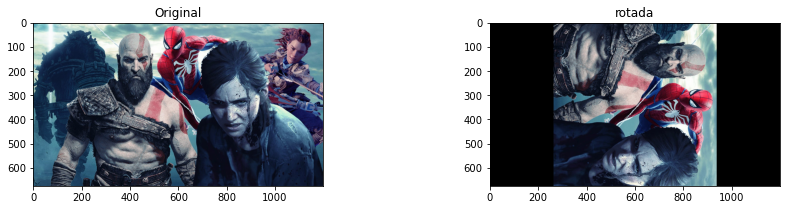

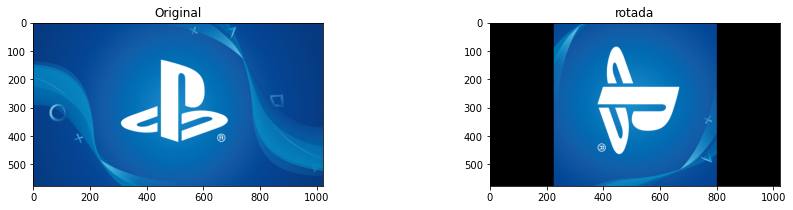

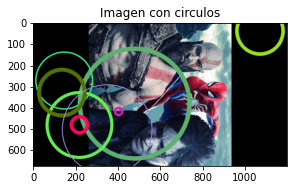

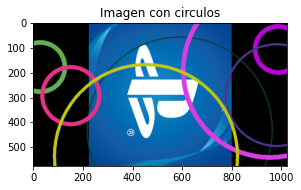

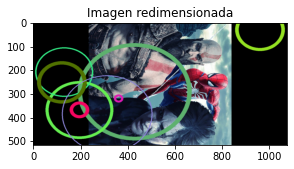

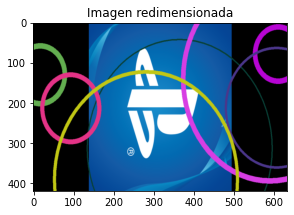

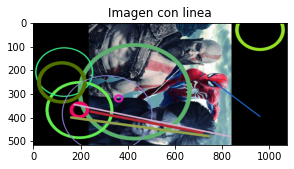

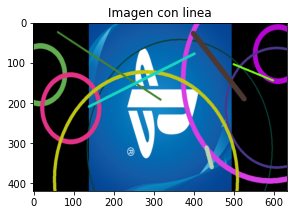

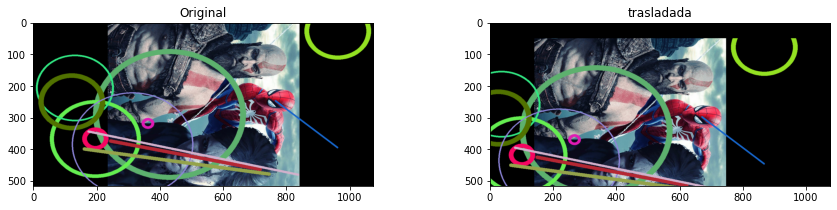

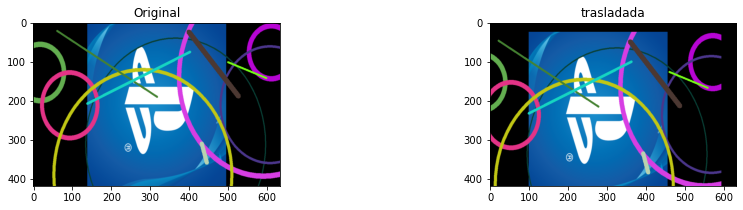

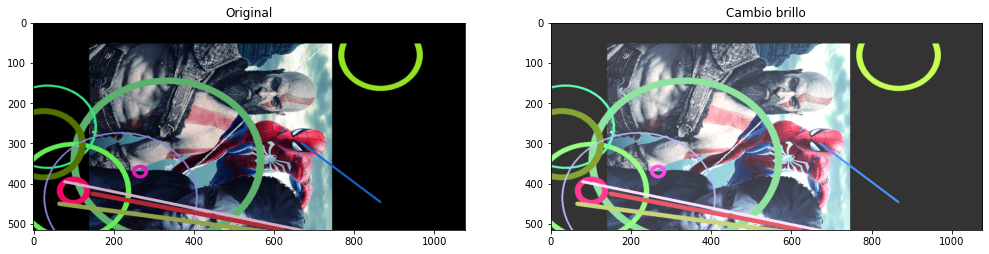

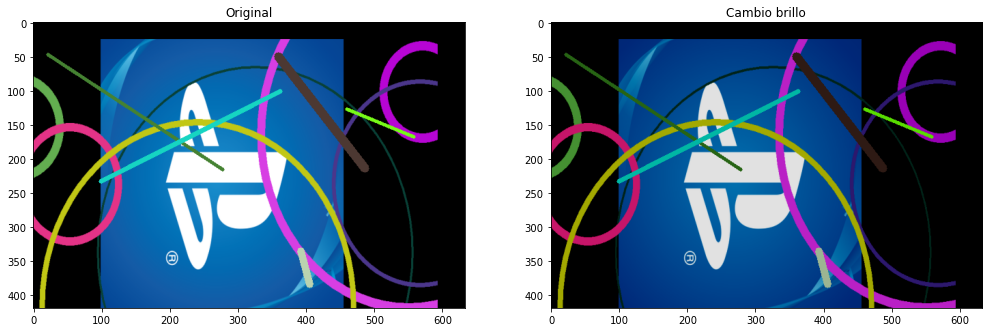

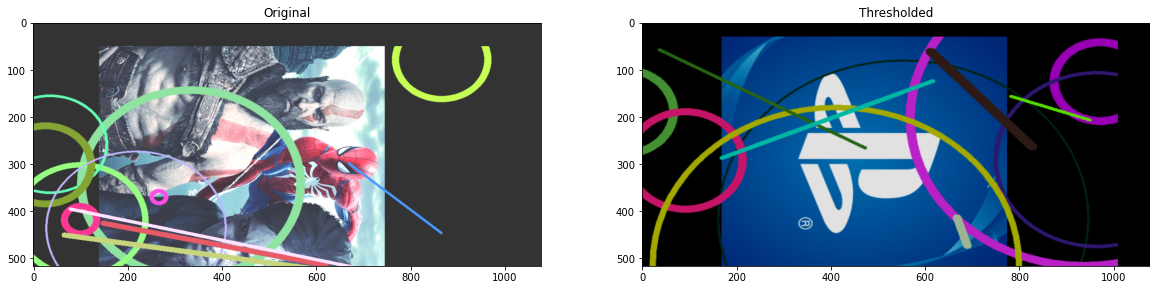

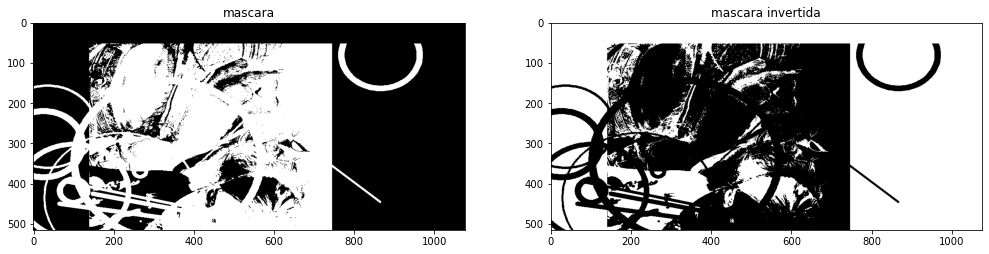

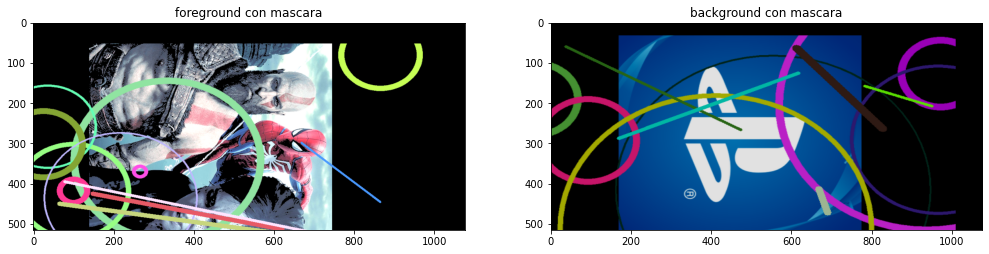

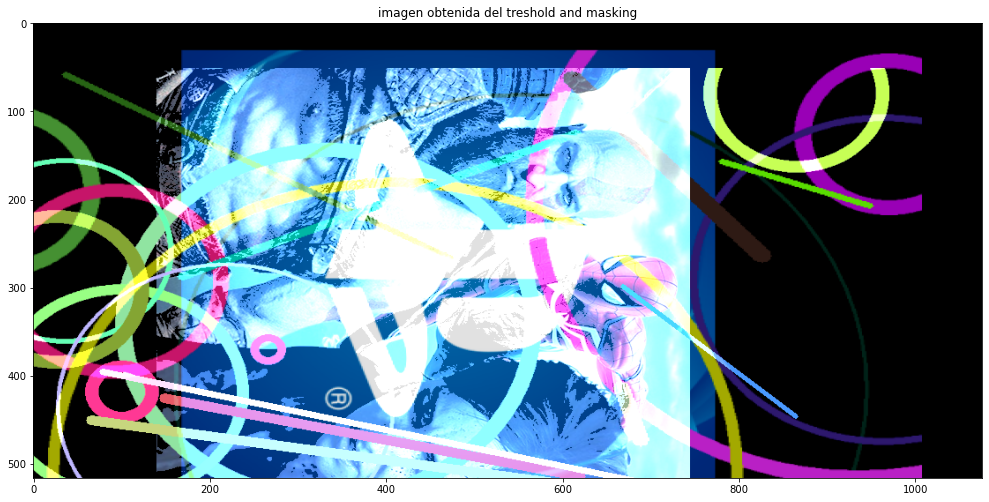

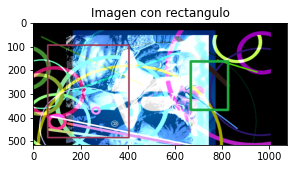

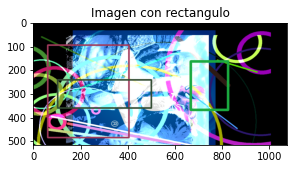

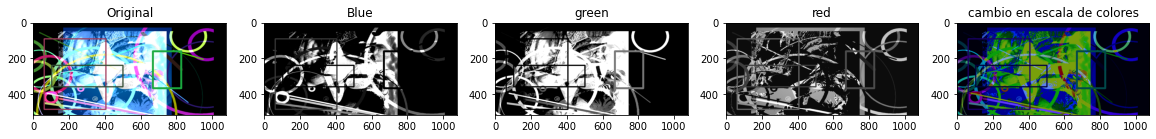

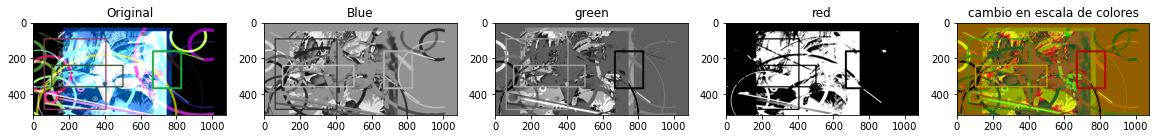

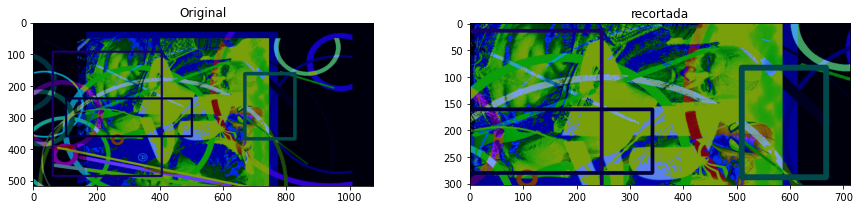

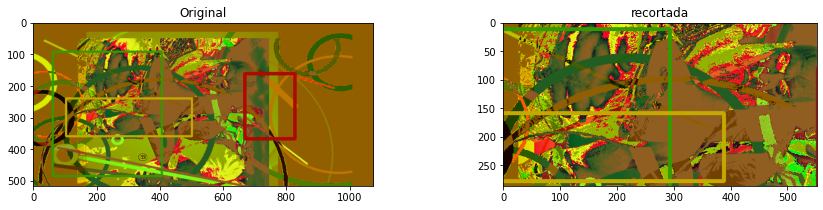

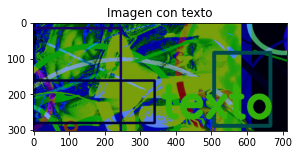

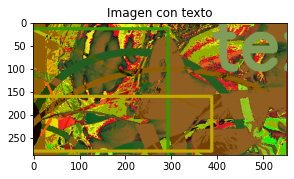

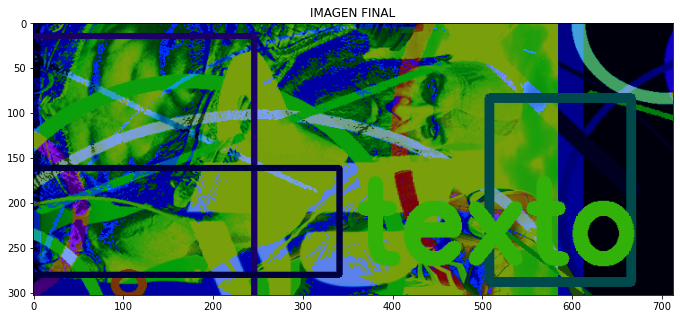

In [41]:
transformations("juegos.jpg","logo-PlayStation.png")